In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
df = pd.read_csv("data/BankChurners.csv")
df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
        axis=1, inplace=True)

In [3]:
display(df.head())
print(df.isna().sum())


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [4]:
print(df.groupby("Attrition_Flag")["CLIENTNUM"].count())
print(df.groupby("Education_Level")["CLIENTNUM"].count())
print(df.groupby("Marital_Status")["CLIENTNUM"].count())
print(df.groupby("Income_Category")["CLIENTNUM"].count())
print(df.groupby("Card_Category")["CLIENTNUM"].count())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: CLIENTNUM, dtype: int64
Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: CLIENTNUM, dtype: int64
Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: CLIENTNUM, dtype: int64
Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
Name: CLIENTNUM, dtype: int64
Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: CLIENTNUM, dtype: int64


Give some order to ordered categorical data

In [5]:
income_map = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, 
               '$80K - $120K': 4, '$120K +': 5}
education_map = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 
               'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
df["Income"] = df["Income_Category"].map(income_map)
df["Education"] = df["Education_Level"].map(education_map)

In [6]:
jump_ship = df[df["Attrition_Flag"] == "Attrited Customer"]
loyal = df[df["Attrition_Flag"] != "Attrited Customer"]

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

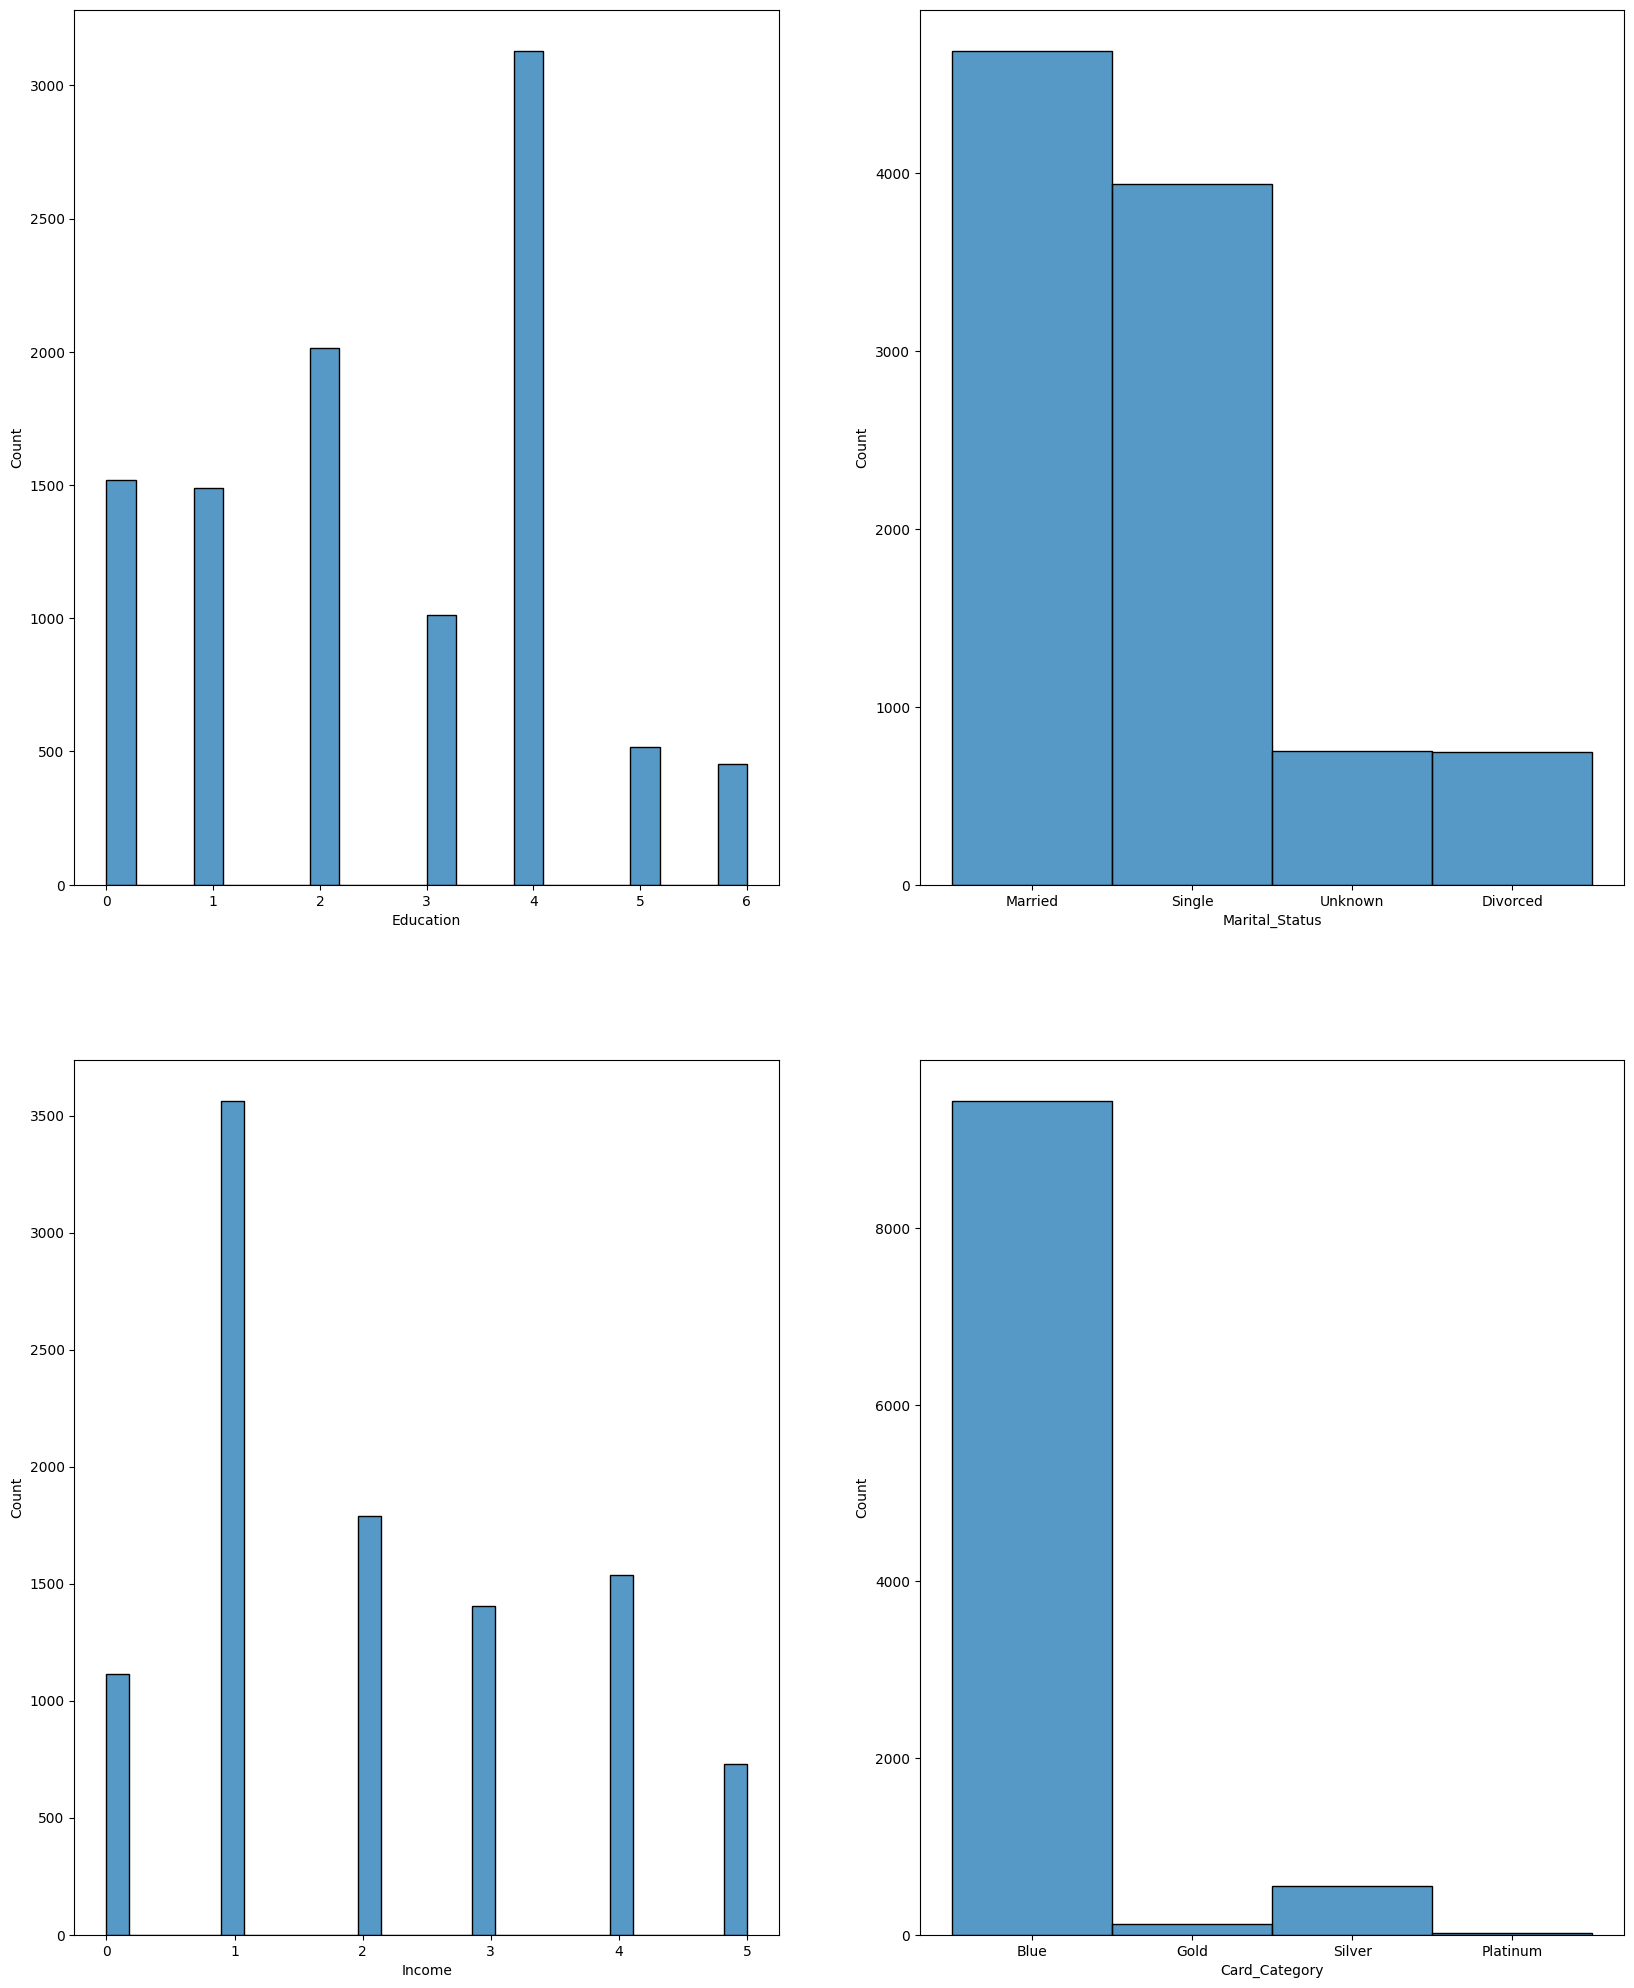

In [7]:
bar_columns = ["Education","Marital_Status","Income","Card_Category"]
if len(bar_columns) % 3 == 0:
    cols = 3
else:
    cols = 2
rows = ceil(len(bar_columns) / cols)
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df[bar_columns[row*cols+col]], ax =axs[row][col])

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

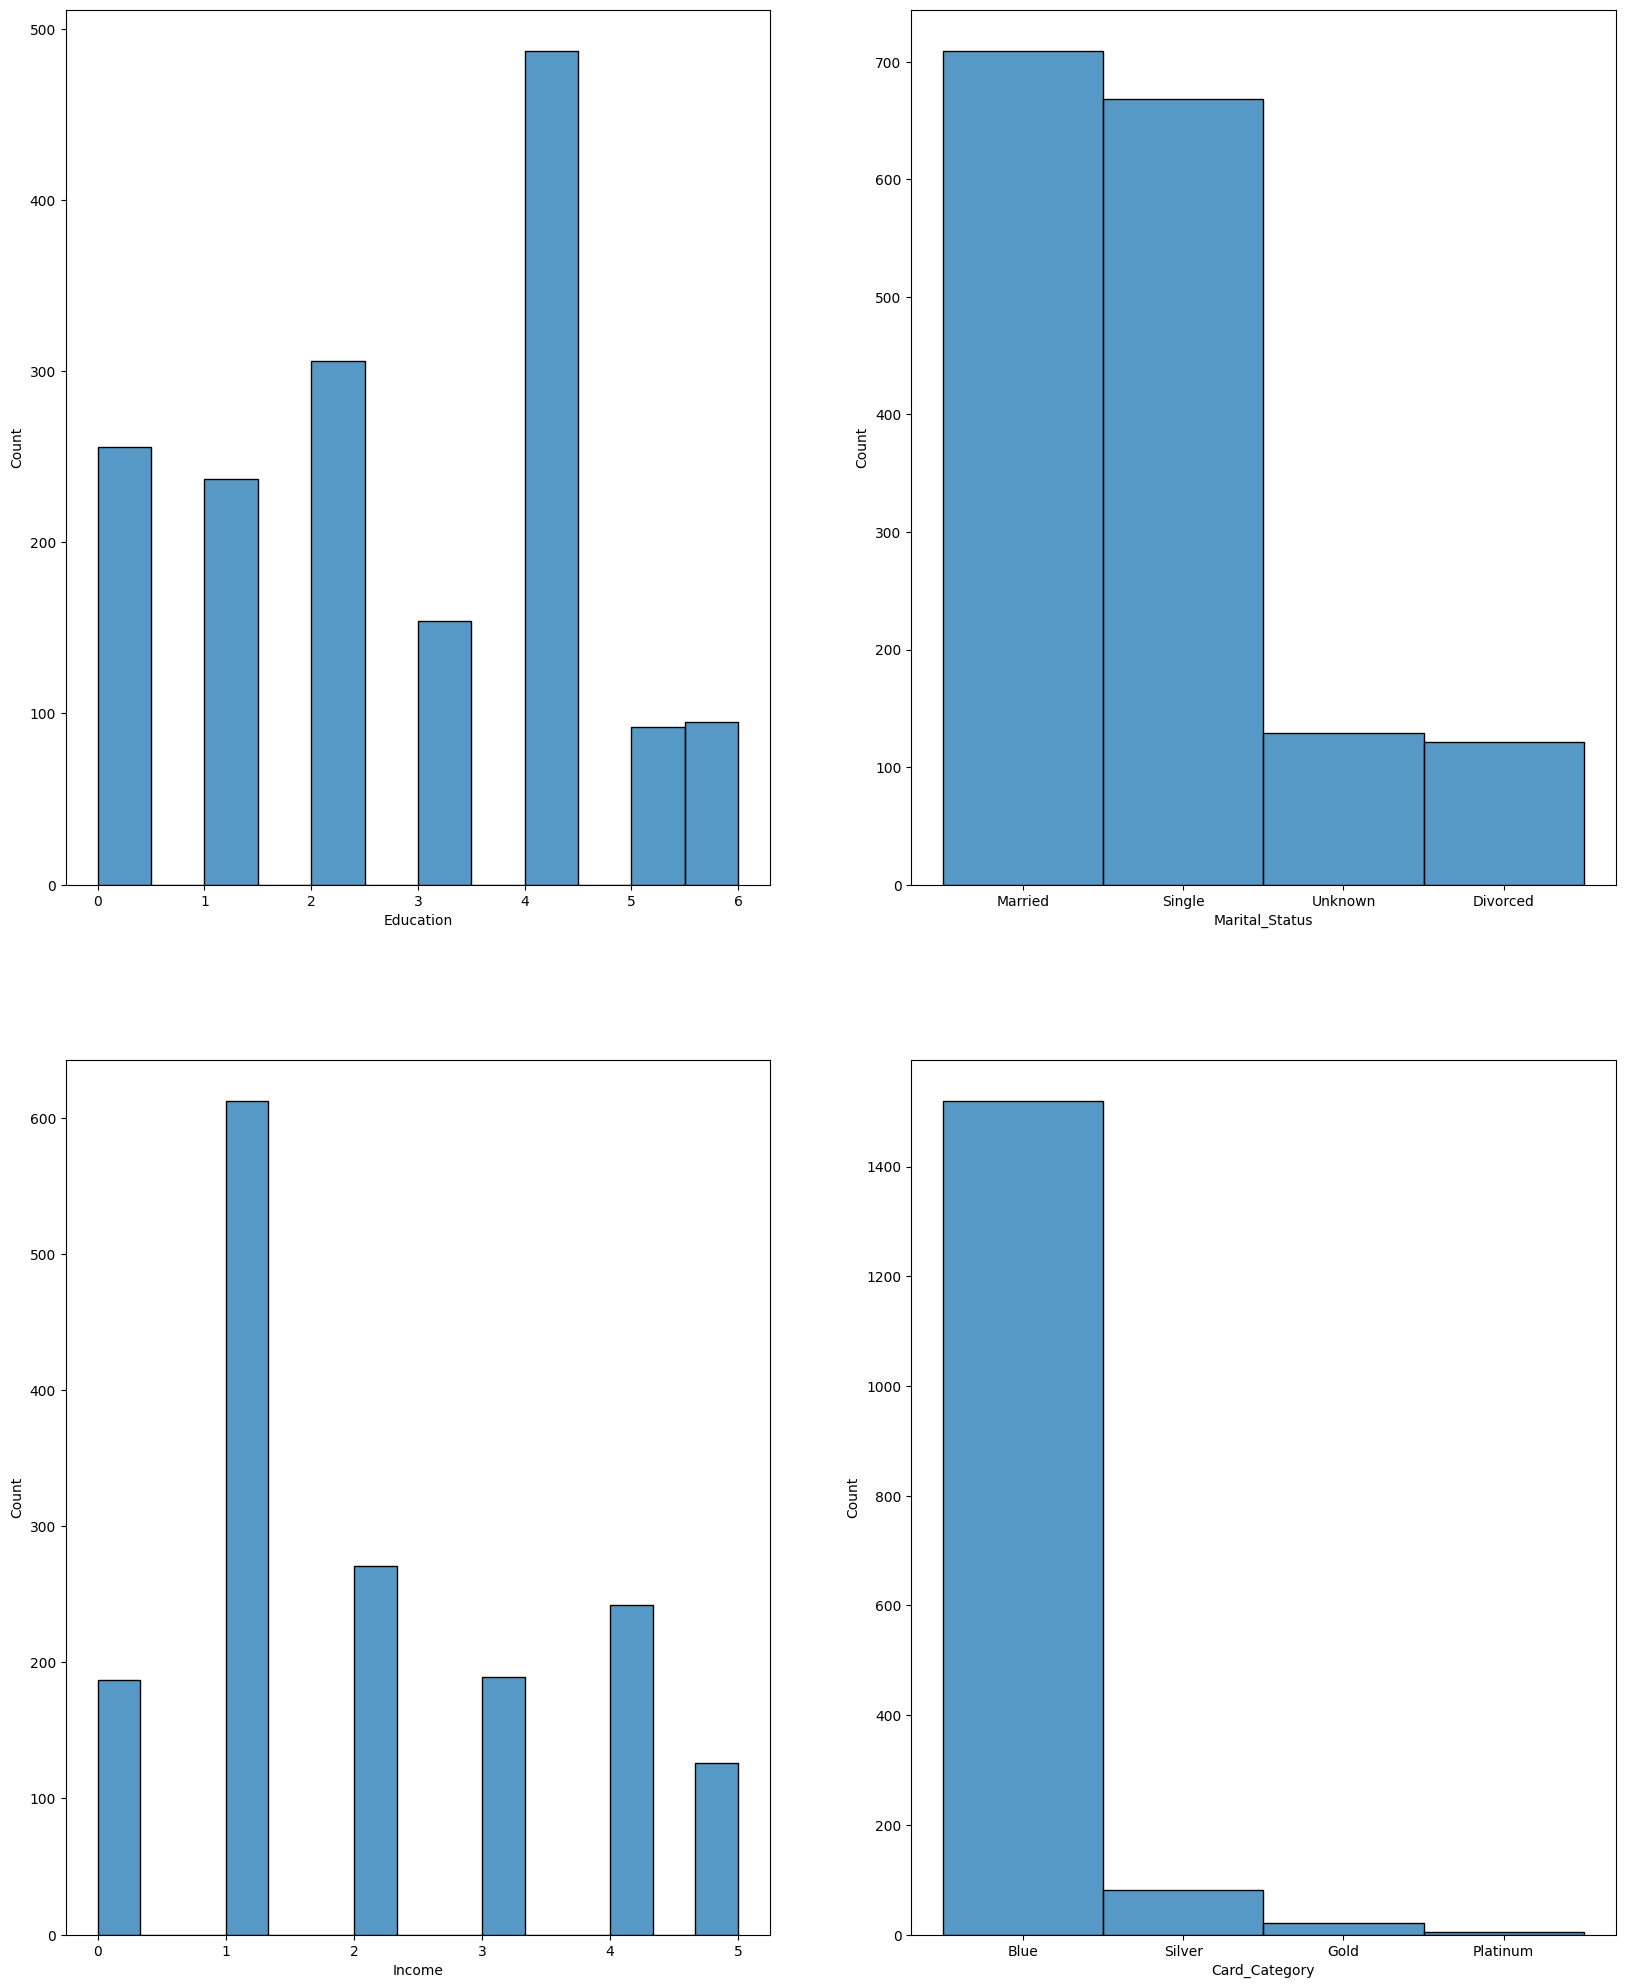

In [8]:
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=jump_ship[bar_columns[row*cols+col]], ax =axs[row][col])

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

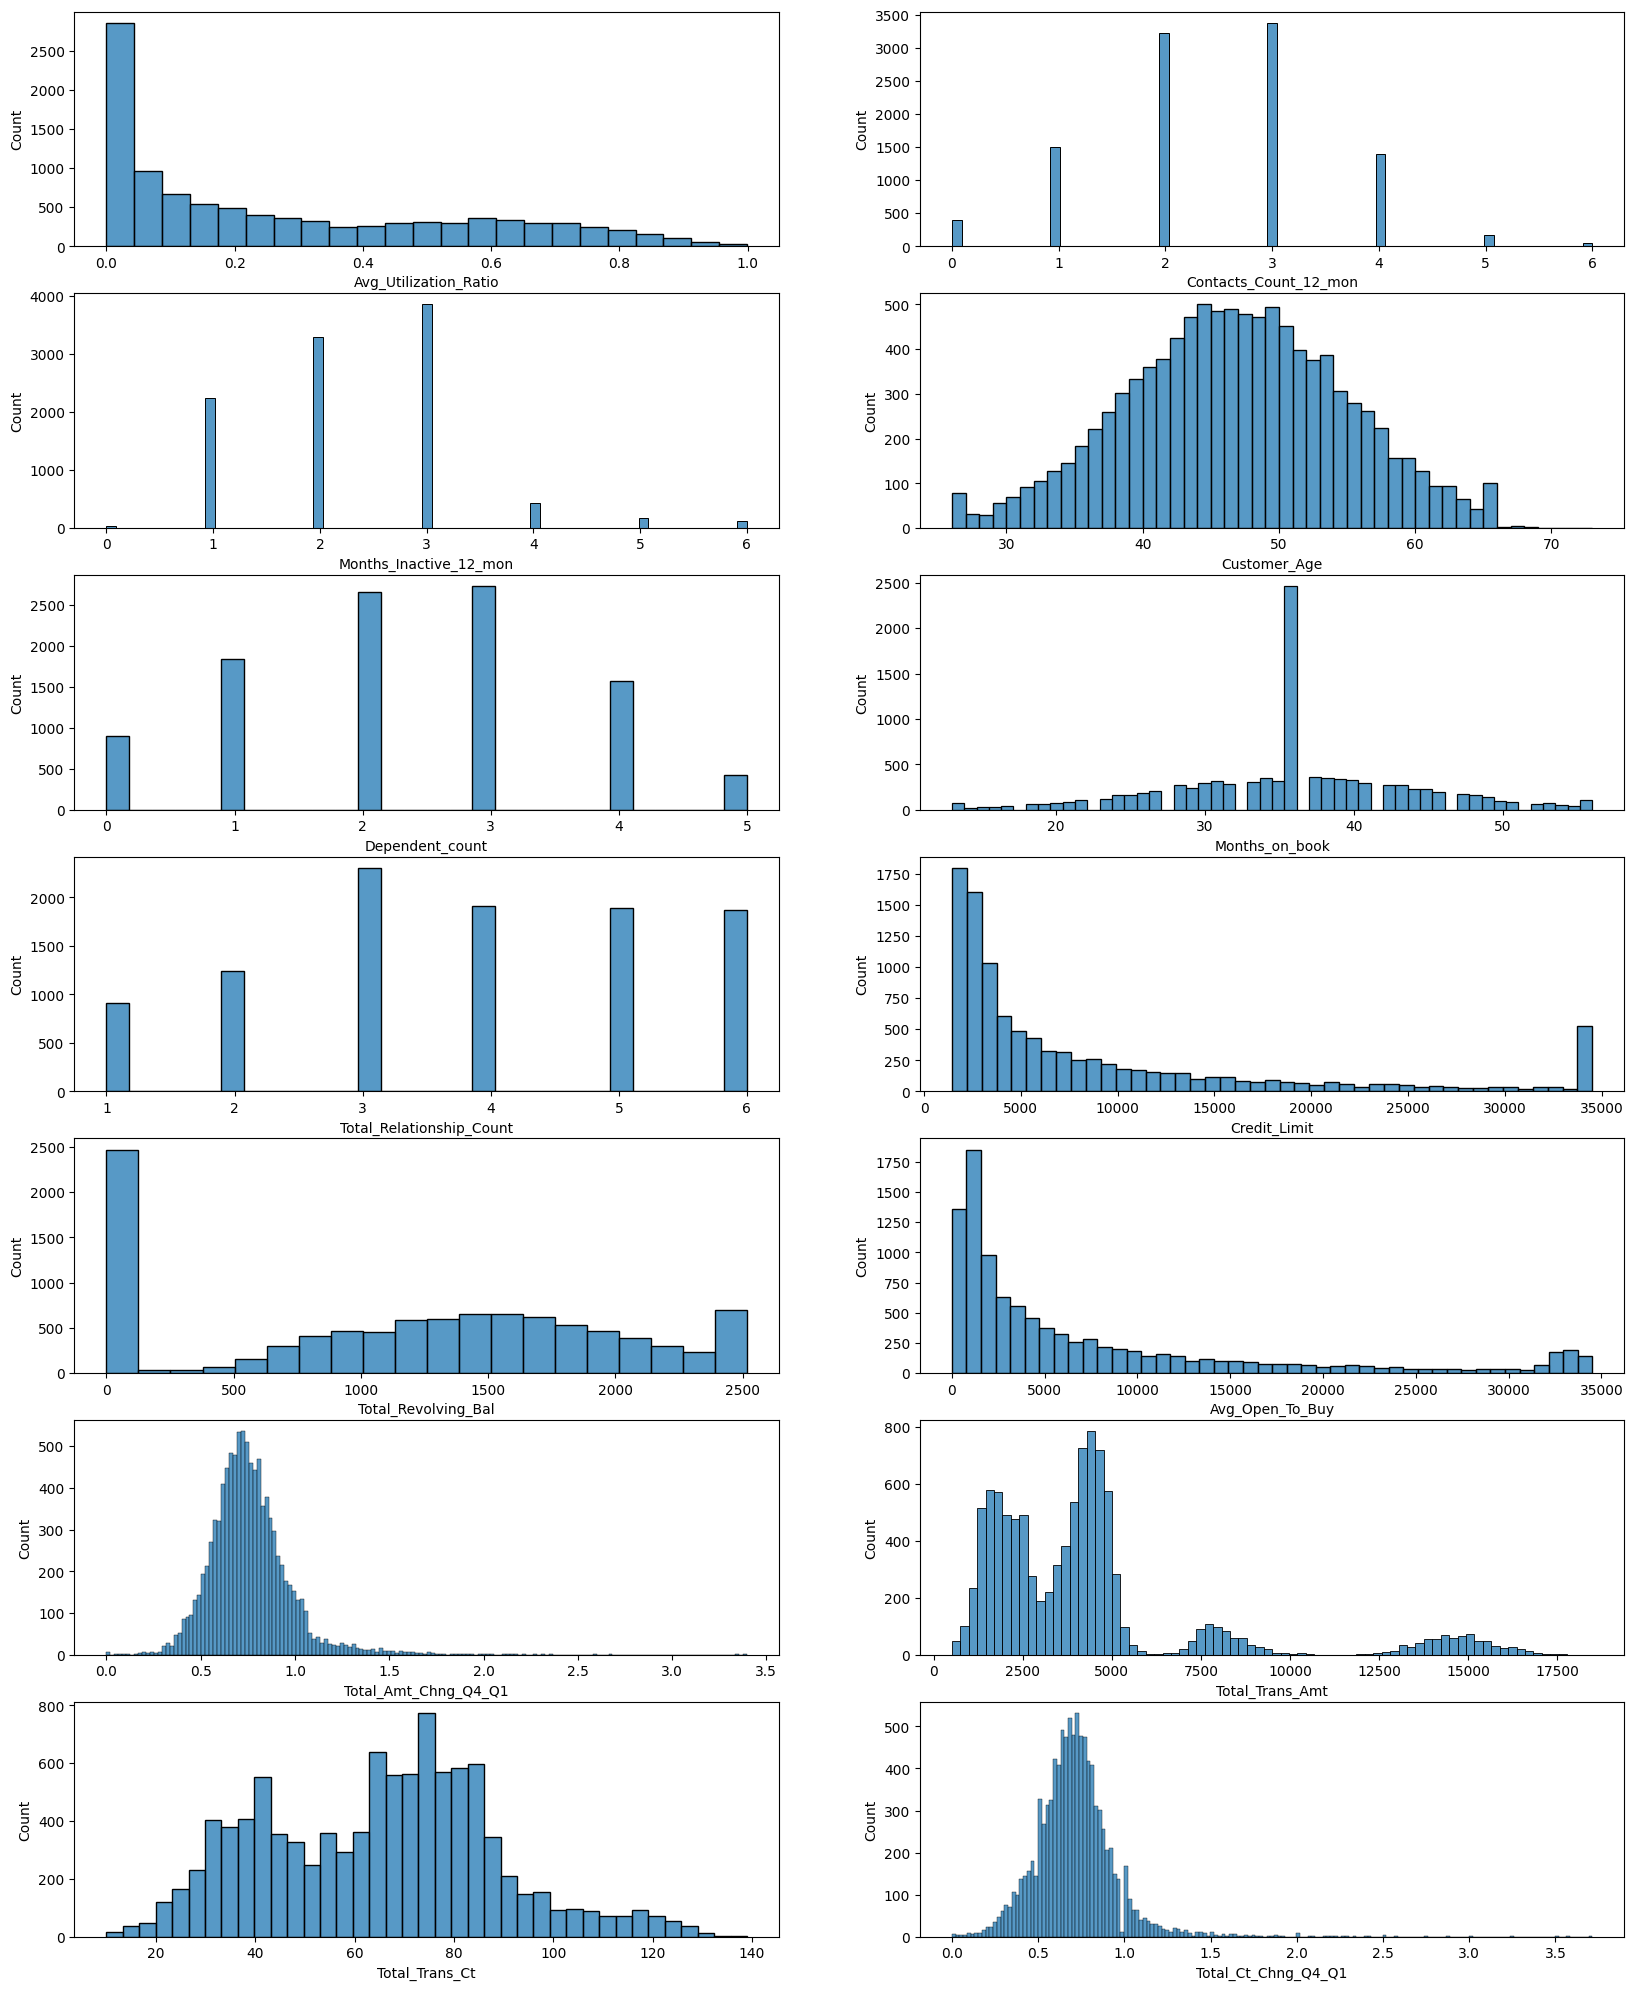

In [9]:
desired_columns = ["Avg_Utilization_Ratio","Contacts_Count_12_mon","Months_Inactive_12_mon","Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct","Total_Ct_Chng_Q4_Q1"]
if len(desired_columns) % 3 == 0:
    cols = 3
else:
    cols = 2
rows = ceil(len(desired_columns) / cols)
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=df[desired_columns[row*cols+col]], ax =axs[row][col])

Same graphics but for customer who have left

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

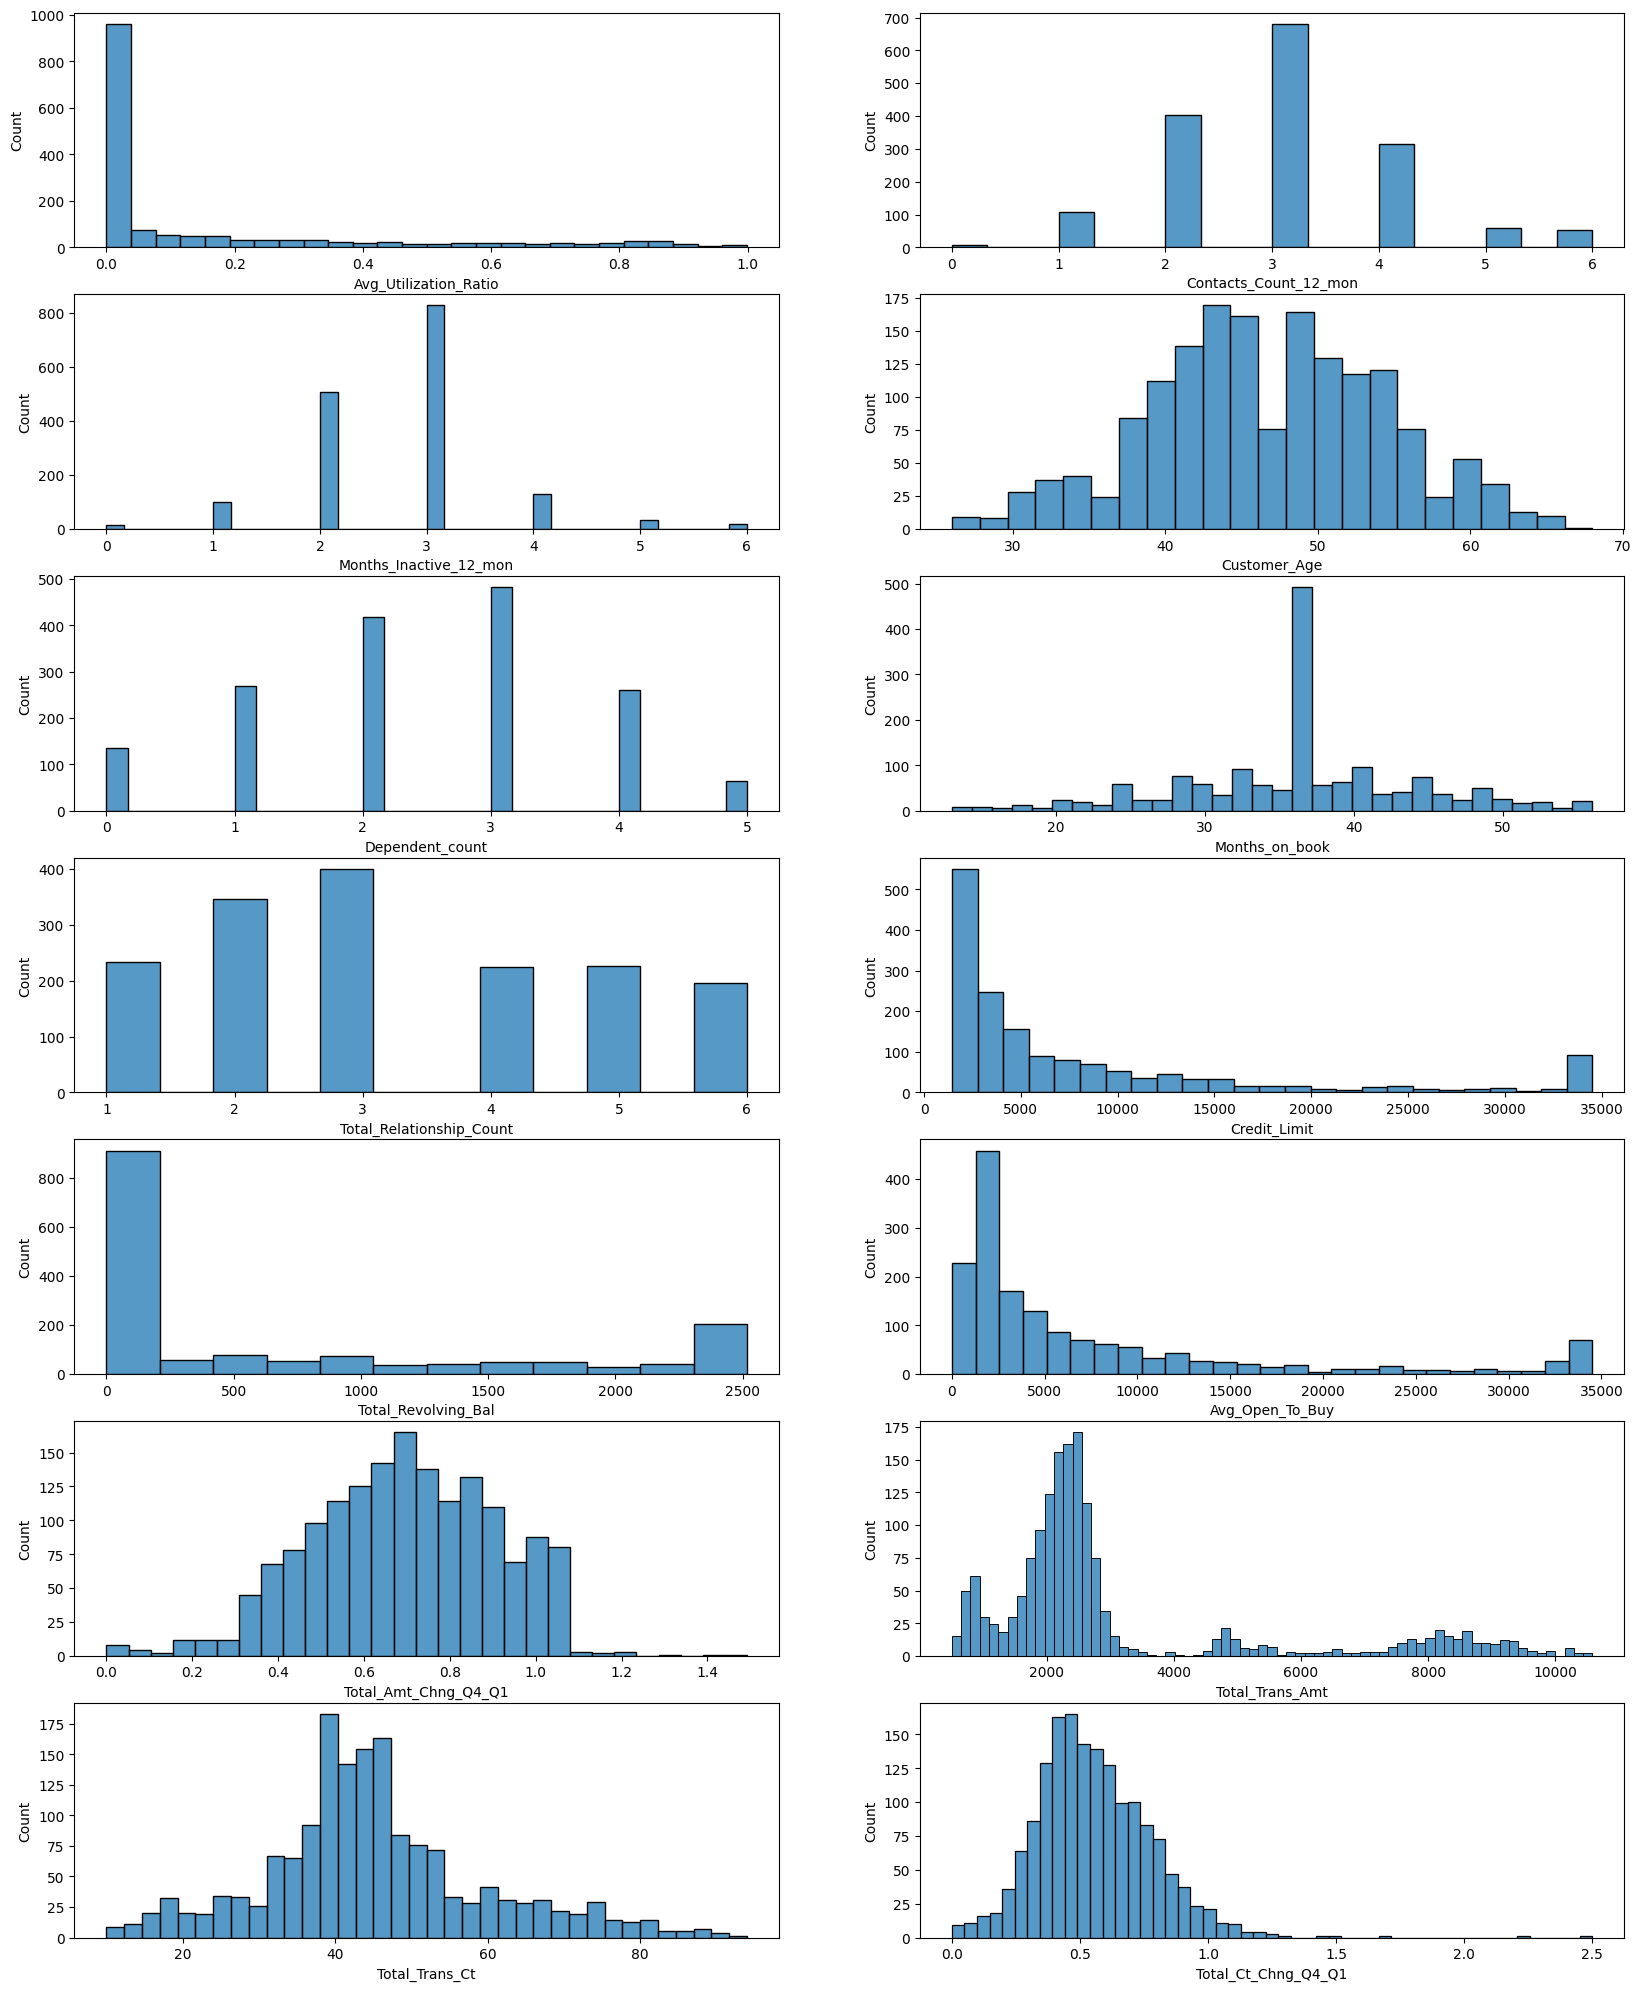

In [10]:
fig, axs = plt.subplots(rows,cols, figsize=(20,25))

for row in range(rows):
    for col in range(cols):
        sns.histplot(data=jump_ship[desired_columns[row*cols+col]], ax =axs[row][col])

# First observations

### Seems to be insightful about churn rate:

- Low Income
- Low utilization ratio
- Apparently more contacts last 12 months
- Total revolving balance. Seems to indicate that people who leave use their card less
- Total Relationship count (number of products from the bank customer uses)
- Total Transaction count/amount.

### Seems to not be related to churn rate:

- Months inactive.
- Age. Weird fun gap at late 40s, but probably due to chance. Need to be aware when modelling
- Dependent count
- Avg Open to buy. (Apparently it's unused balance, seems similar for now but worth digging deeper)


### Undecided:

- Months on book. Has the weird spike, looks like data flaw, needs further investigation.
- Credit limit. Does not look super impactful but worth a deeper look.
- Total transaction amount and change: Does not seem to be super impactful but worth more careful look

# First observations

### Seems to be insightful about churn rate:

- Low Income
- Low utilization ratio
- Apparently more contacts last 12 months
- Total revolving balance. Seems to indicate that people who leave use their card less
- Total Relationship count (number of products from the bank customer uses)
- Total Transaction count/amount.

### Seems to not be related to churn rate:

- Months inactive.
- Age. Weird fun gap at late 40s, but probably due to chance. Need to be aware when modelling
- Dependent count
- Avg Open to buy. (Apparently it's unused balance, seems similar for now but worth digging deeper)


### Undecided:

- Months on book. Has the weird spike, looks like data flaw, needs further investigation.
- Credit limit. Does not look super impactful but worth a deeper look.
- Total transaction amount and change: Does not seem to be super impactful but worth more careful look

I should actually put this graphics side by side so it's easier to compare.

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

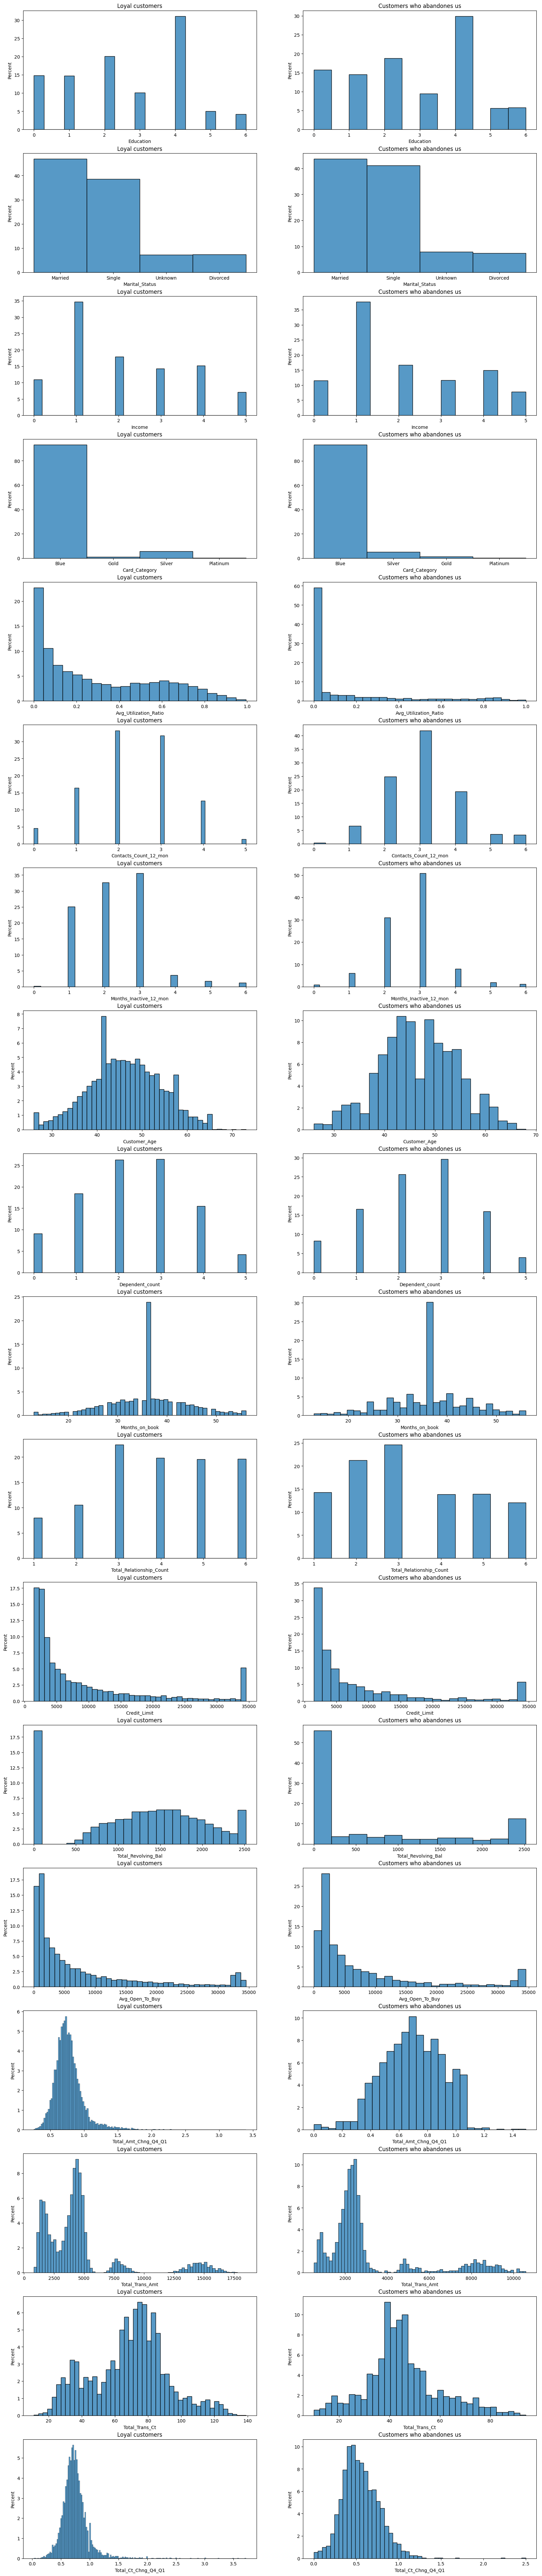

In [11]:
columns_to_be_plotted= ("Education"
                        ,"Marital_Status"
                        ,"Income"
                        ,"Card_Category"
                        ,"Avg_Utilization_Ratio"
                        ,"Contacts_Count_12_mon"
                        ,"Months_Inactive_12_mon"
                        ,"Customer_Age"
                        ,"Dependent_count"
                        ,"Months_on_book"
                        ,"Total_Relationship_Count"
                        ,"Credit_Limit"
                        ,"Total_Revolving_Bal"
                        ,"Avg_Open_To_Buy"
                        ,"Total_Amt_Chng_Q4_Q1"
                        ,"Total_Trans_Amt"
                        ,"Total_Trans_Ct"
                        ,"Total_Ct_Chng_Q4_Q1"
                        )
#Fixed 2 columns for easier comparison
rows = len(columns_to_be_plotted)
fig, axs = plt.subplots(rows,cols, figsize=(20,100))

#fig.suptitle("Customers who stayed vs customers who left", fontsize=20)


for row in range(rows):
        sns.histplot(data=loyal[columns_to_be_plotted[row]], stat='percent', ax =axs[row][0])
        axs[row][0].set_title("Loyal customers")
        sns.histplot(data=jump_ship[columns_to_be_plotted[row]], stat='percent', ax =axs[row][1])
        axs[row][1].set_title("Customers who abandones us")

# Updated Observations:

### Seems to be directly insightful about churn rate:

- Avg_Utilization_Ratio: Customers who left are disproportionally represented in the low usage. There's a chance they leave not because they are unhappy with our services but don't use it at all.
- Contacts_count_12mo. Interestingly seems somewhat well distributed, but very few customers who left us had 0 contacts on the last 12 months. Might be worth some other investigation, seems intriguing but not sure why (maybe we remind someone who is our customer that they are still our customer and they 'remember' and quit? Forgetting to cancel services is a pretty big source of revenue in the world nowadays).
- Months_Inactive_12mo: Intriguing, most customers whether they left or not had at least 3 inactive months in the last year. This might be nothing but this might also be representative of the customers we are about to lose.
- Total revolving balance. Lots of people with 0 revolving balance, once again seems like those who abandon us are not heavy users, although need to make sure my understanding of revolving balance is correct.
- Total Relationship count (number of products from the bank customer uses). Users who leave tend to use less products.
- Total Transaction count. Lower transaction amount also points in users leaving.

### Seems to not be directly related to churn rate:

- Education
- Marital Status (A little bit higher proprtion of single people abandoned us, but the effect is small and even if real, it's probably represented  better by another variable, like income)
- Income. Subset seems very representative of the loyal customers.
- Card Category (might have an effect, but one ategory is so overwhelming in our dataset that using the others in the model is more likely to cause problems than help. Also effect likely represented in other variables, if it exists at all).
- Age. Weird fun gap at late 40s, but probably due to chance. Need to be aware when modelling.
- Dependent count, similar to marital status. Maybe together those 2 can offer insights.



### Undecided:

- Months on book. Has the weird spike, looks like data flaw, needs further investigation.
- Credit limit. Does not look super impactful but worth a deeper look, especially because seaborn didn't use the same bin size lol.
- Total transaction amount and change: Does not seem to be super impactful but worth more careful look
- Avg Open to buy. Data on it's own is meaningless, needs to use usage, which might be avg usage already. Maybe the trio of avg_use, limit and avg_open are just redundant data talking about the same thing.
- Total_count_change_Q4Q1. Hard to see again, but if less usage = out, it should tells us something.

### Note

I'm deliberately not using gender because whatever insight it might offer (even if significant and meaningful), it's likely to be the result of expectations and gender inequality. Using that variable in our future model is more likely to reinforce such expectations and inequality. While there's clearly value in analysing those effects for better understand and finding ways to fight them, this is beyond the scope of this project.

Let's normalize and look at the interesting variables one by one.

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

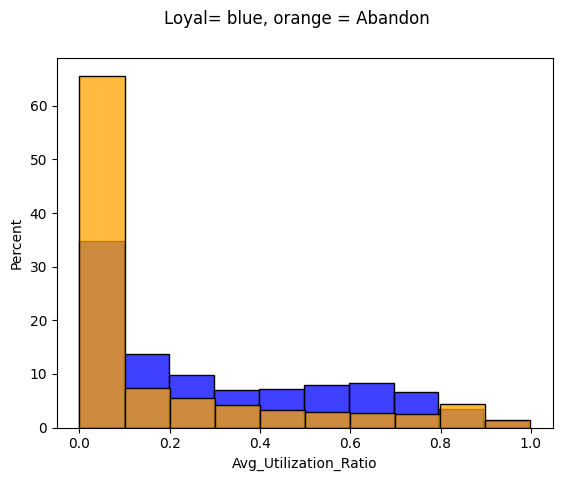

In [12]:
col = "Avg_Utilization_Ratio"
bins = 10
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")


/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

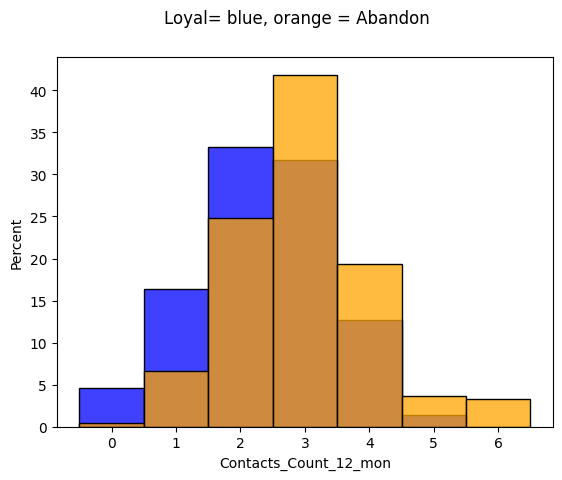

In [13]:
col = "Contacts_Count_12_mon"
bins = 10
discrete = True
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")


/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

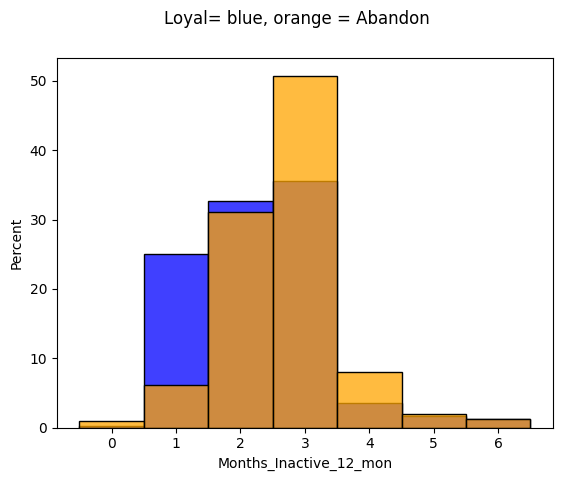

In [14]:
col = "Months_Inactive_12_mon"
bins = 10
discrete = True
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

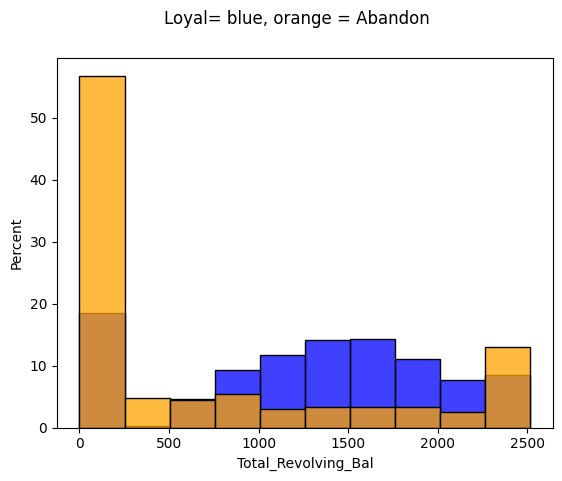

In [15]:
col = "Total_Revolving_Bal"
bins = 10
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

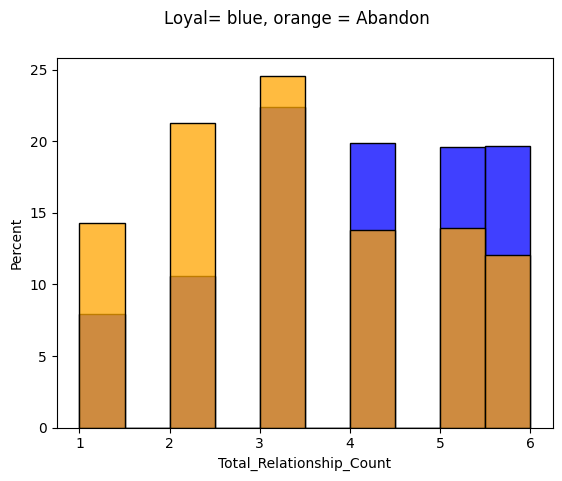

In [16]:
col = "Total_Relationship_Count"
bins = 10
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

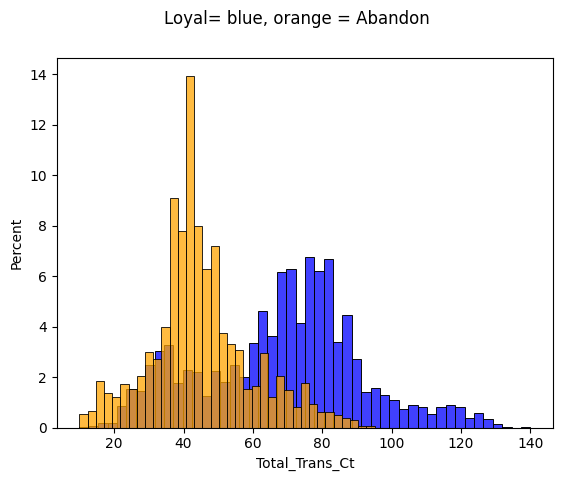

In [17]:
col = "Total_Trans_Ct"
binrange = (10,140)
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, binrange=binrange, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, binrange=binrange, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

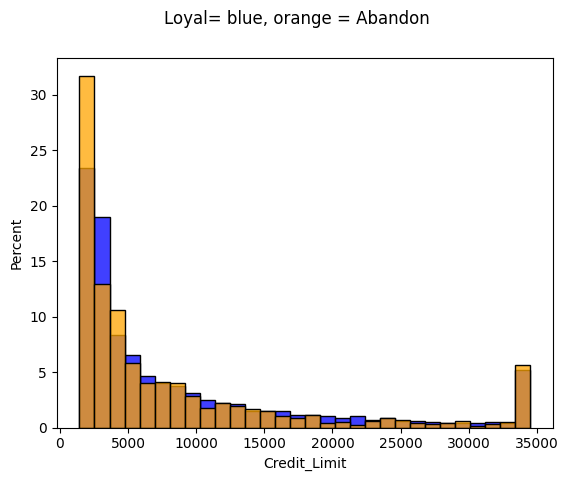

In [18]:
col = "Credit_Limit"
bins = 30
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, bins=bins, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

Meh, seems somewhat representative. There's a non significant difference at the low range, but not sure I'm interested in it.

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

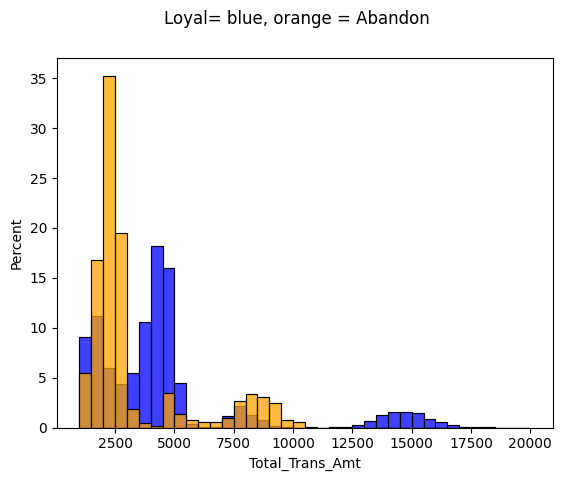

In [19]:
col = "Total_Trans_Amt"
binwidth = 500
binrange = (1000,20000)
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, binwidth=binwidth, binrange=binrange, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, binwidth=binwidth, binrange=binrange, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(0.5, 0.98, 'Loyal= blue, orange = Abandon')

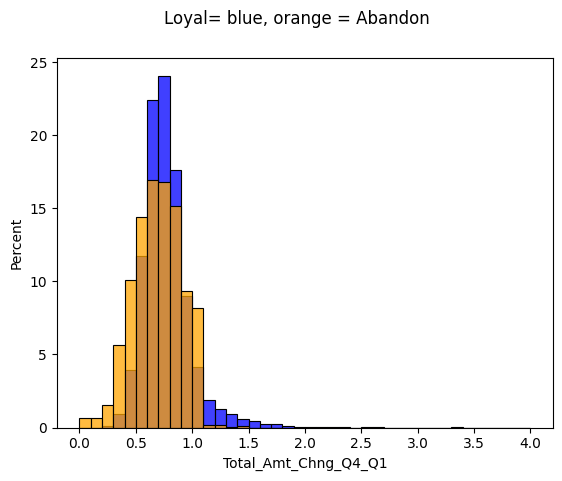

In [20]:
col = "Total_Amt_Chng_Q4_Q1"
binwidth = 0.1
binrange = (0,4)
discrete = False
fig, axs = plt.subplots()
fig.suptitle(col, fontsize=20)
l=sns.histplot(data=loyal[col], stat='percent', ax =axs, binwidth=binwidth, binrange=binrange, discrete=discrete, color='blue')
j=sns.histplot(data=jump_ship[col], stat='percent', ax =axs, binwidth=binwidth, binrange=binrange, discrete=discrete, color='orange')
fig.suptitle("Loyal= blue, orange = Abandon")

In [21]:
sample = df[df["Total_Trans_Amt"] < 3000]

print(df.groupby("Attrition_Flag")["CLIENTNUM"].count()/df.shape[0])
print(sample.groupby("Attrition_Flag")["CLIENTNUM"].count()/sample.shape[0])


Attrition_Flag
Attrited Customer    0.16066
Existing Customer    0.83934
Name: CLIENTNUM, dtype: float64
Attrition_Flag
Attrited Customer    0.329653
Existing Customer    0.670347
Name: CLIENTNUM, dtype: float64


In [22]:
sample = df[df["Total_Trans_Ct"] < 60]

print(df.groupby("Attrition_Flag")["CLIENTNUM"].count()/df.shape[0])
print(sample.groupby("Attrition_Flag")["CLIENTNUM"].count()/sample.shape[0])


Attrition_Flag
Attrited Customer    0.16066
Existing Customer    0.83934
Name: CLIENTNUM, dtype: float64
Attrition_Flag
Attrited Customer    0.349848
Existing Customer    0.650152
Name: CLIENTNUM, dtype: float64


## Part 2. Modelling

Now the goal is to create a simple, intuitive, and manual baseline model we can use as a reference later on.

In [23]:
def baseline_model(features_df):
    trans_count_max = 60
    rel_count_max = 3
    uti_ratio_max = 0.1
    ret = features_df.assign(predictions = 
                                (features_df["Total_Trans_Ct"] < trans_count_max)
                                | ((features_df["Avg_Utilization_Ratio"] < uti_ratio_max)
                                & (features_df["Total_Relationship_Count"] < rel_count_max))
                                )
    return ret

In [660]:
def evaluation(pred, y):
    tp = ((pred == True) & (y == True)).sum()
    fp = ((pred == True) & (y == False)).sum()
    fn = ((pred == False) & (y == True)).sum()
    precision = tp / (tp + fp)
    recall = tp / (fn + tp)
    f1 =2 * precision * recall / (precision + recall)
    return {'precision': precision, 'recall': recall, 'f1': f1}

In [661]:
prediction_df = baseline_model(df)
results = evaluation(prediction_df["predictions"], prediction_df["Attrition_Flag"] != "Existing Customer")
print(results)

{'precision': 0.3205491392460231, 'recall': 0.9041180086047941, 'f1': 0.4732947232947233}


In [226]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
from random import randint

{'precision': 0.6746575342465754, 'recall': 0.5915915915915916, 'f1': 0.6304000000000001}


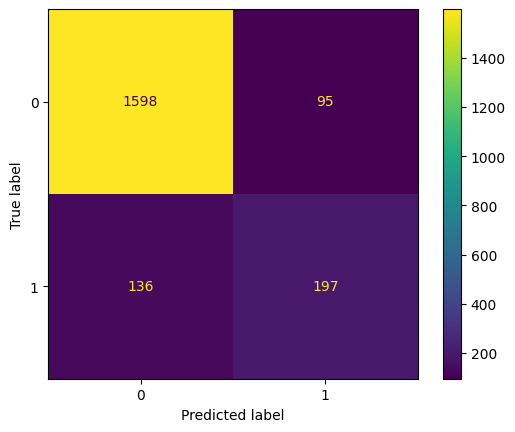

In [662]:
X = df[["Total_Trans_Ct", "Avg_Utilization_Ratio", "Total_Relationship_Count"]].to_numpy()
y = (df["Attrition_Flag"] != "Existing Customer").to_numpy()
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.20)
transformer = MaxAbsScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
rf = RandomForestClassifier(max_depth=None, min_samples_split=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(evaluation(y_pred,y_test))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

In [665]:
# Same thing but with everything, we just need to process the data a little before
#gender_map = {'M': -1, 'F': 1}
#df["gender"] = df["Gender"].map(gender_map)
dummy = pd.get_dummies(df["Marital_Status"])
dummy.drop(columns=dummy.columns[-1], inplace=True)
df2 = pd.concat([dummy, df.drop(columns=["CLIENTNUM"
                                         , "Attrition_Flag"
                                         , "Gender"
                                         , "Education_Level"
                                         , "Marital_Status"
                                         , "Income_Category"
                                         , "Card_Category"
                                        ])], axis=1)

{'precision': 0.9351145038167938, 'recall': 0.7313432835820896, 'f1': 0.8207705192629816}


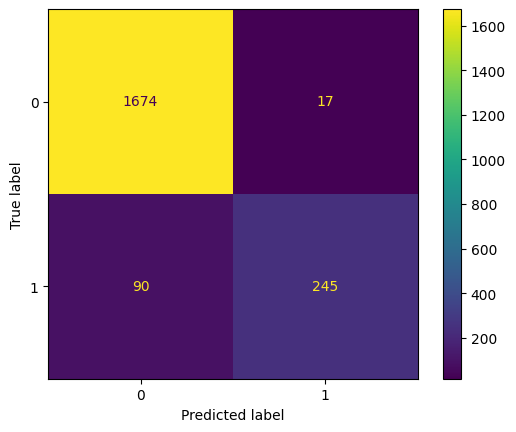

In [668]:

X = df2.to_numpy()
y = (df["Attrition_Flag"] != "Existing Customer").to_numpy()
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.20)
transformer = MaxAbsScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
rf = RandomForestClassifier(n_estimators=10,max_depth=20, min_samples_split=2, class_weight='balanced_subsample')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(evaluation(y_pred,y_test))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

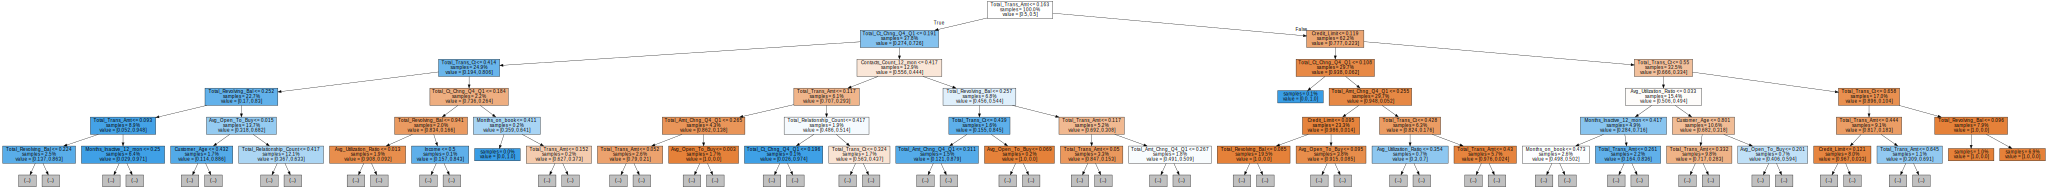

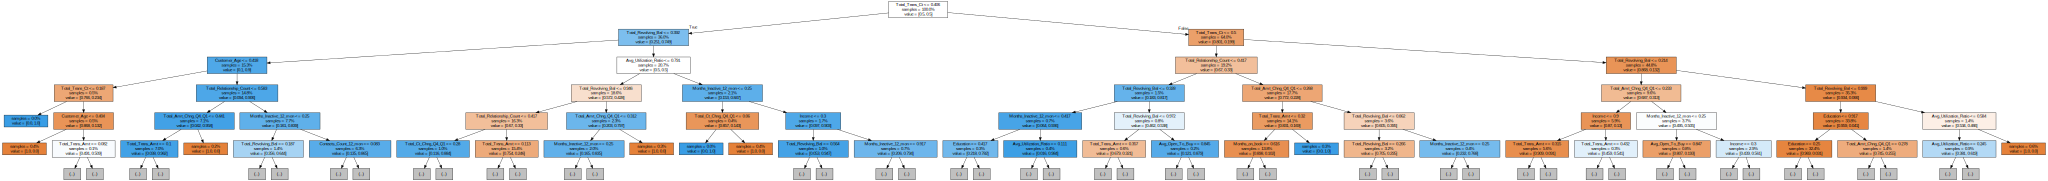

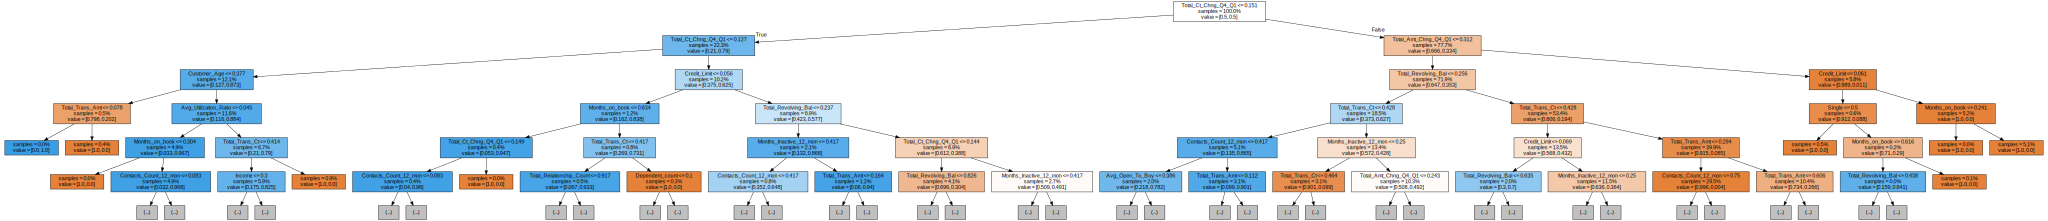

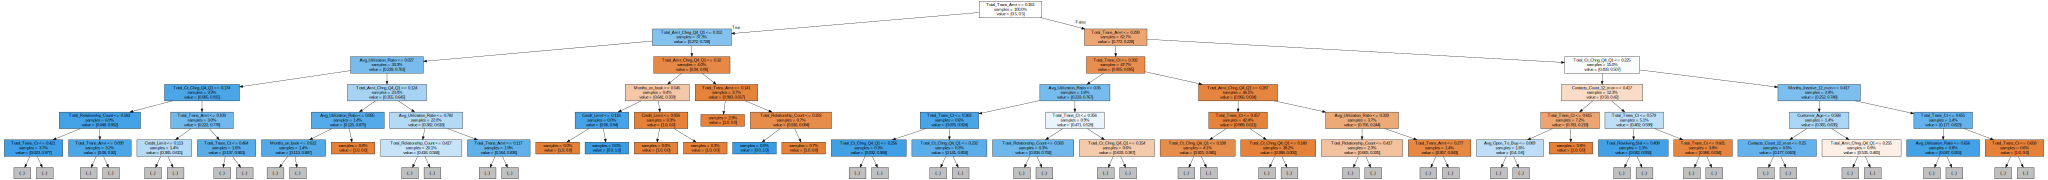

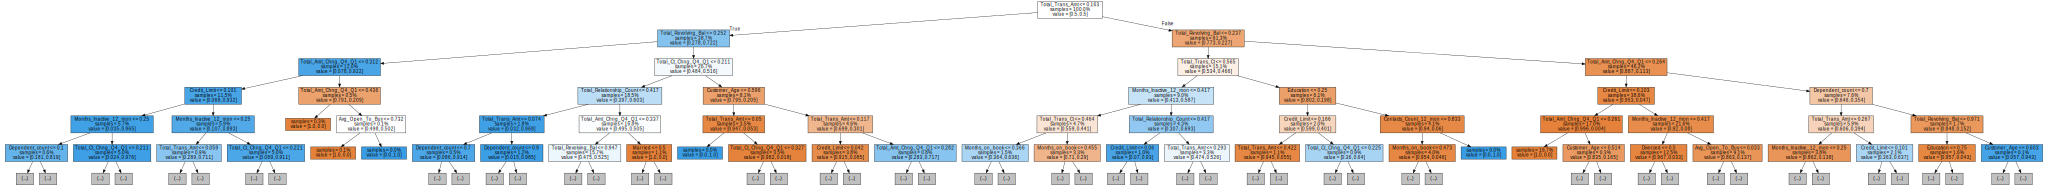

In [669]:
#Let's try and understand our random forest
#Visualize a few trees in our random forest
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df2.columns,  
                               filled=True,  
                               max_depth=5, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


Seems indeed that information regarding the usage of the card (avg utilization, transaction count etc) are the most relevant, making the early big splits.
Some minor experimentation shows that increasing the number of trees in our forest does not increase accuracy that much, which also indicates that our trees are converging into a similar logic (seems like a little under 10 trees is enough to give a stable peak result), this might be a consequence of the imbalance in sampling. Since customers who have left represent only ~15% of the data set, our trees converge faster in some kind of variation of "if they are using they are not leaving" giving us the low recall, high precision etc. I'll experiment with rebalancing the data sampling using the BalancedRandomForestClassifier, which will balance the subsamples for each tree causing, probably increasing variance in tree models and hopefully increasing recall.

{'precision': 0.7808564231738035, 'recall': 0.9337349397590361, 'f1': 0.8504801097393689}


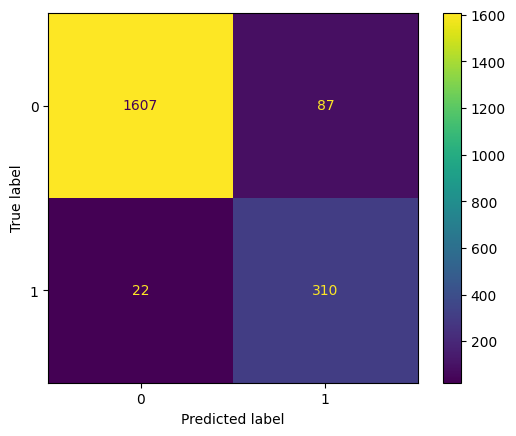

In [670]:
X = df2.to_numpy()
y = (df["Attrition_Flag"] != "Existing Customer").to_numpy()
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.20)
transformer = MaxAbsScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
# Still random forest but changes the underlying sampling logic.
rf = BalancedRandomForestClassifier(n_estimators=40,max_depth=None, min_samples_split=2, sampling_strategy='all', replacement=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(evaluation(y_pred,y_test))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

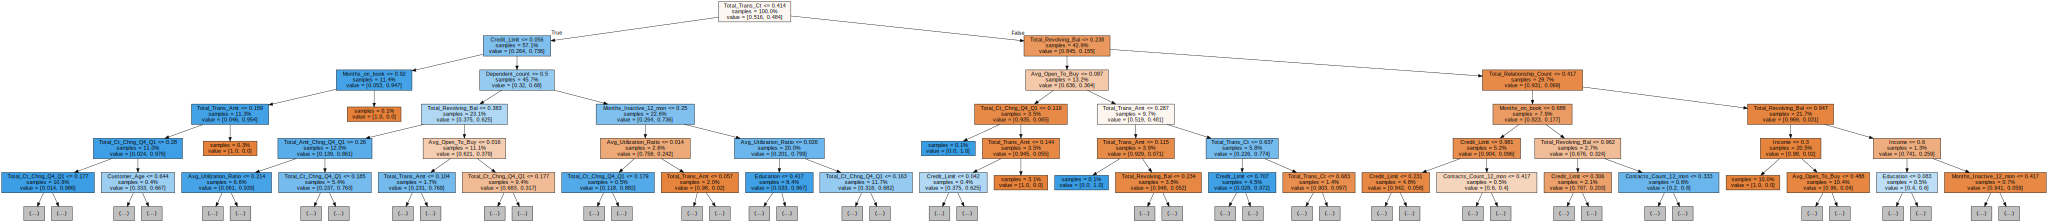

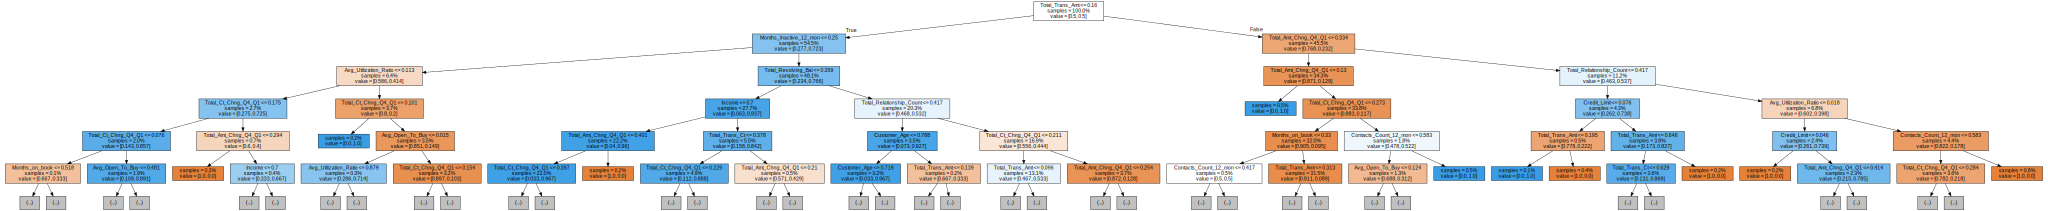

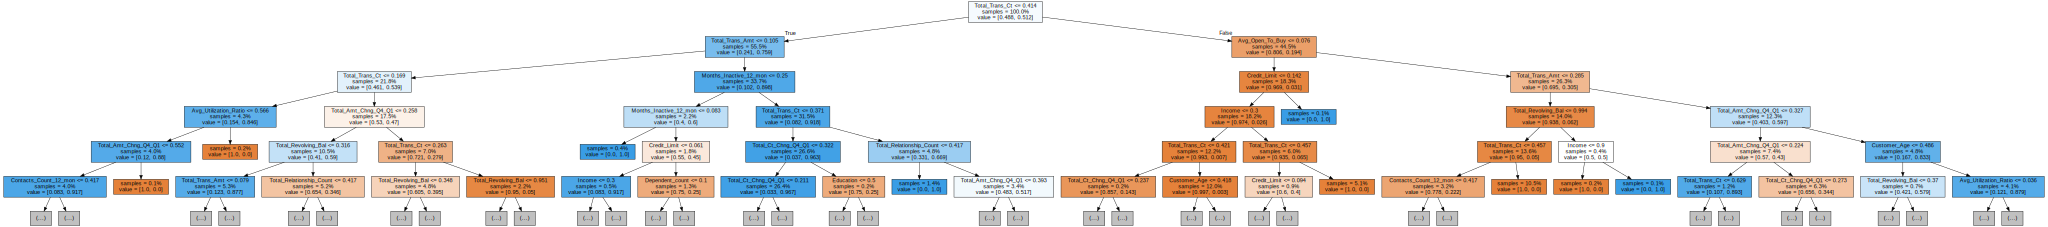

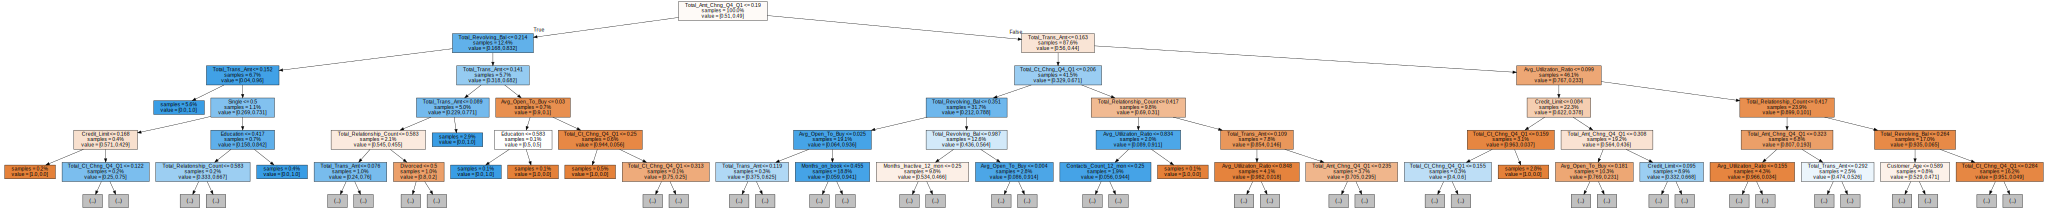

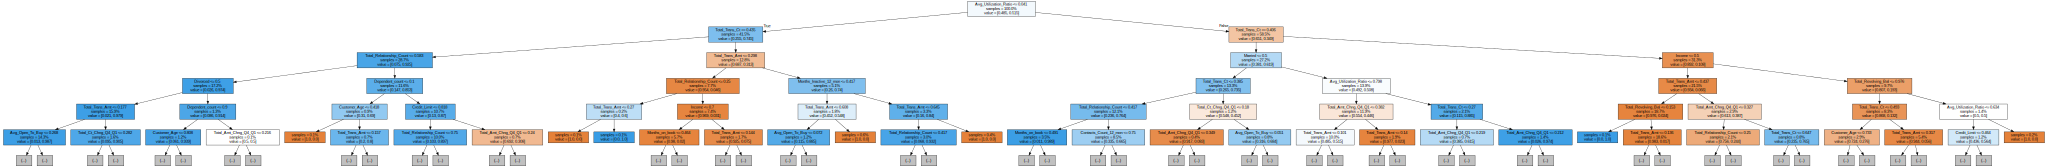

In [671]:
#Let's try and understand our random forest
#Visualize a few trees in our random forest
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df2.columns,  
                               filled=True,  
                               max_depth=5, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


Even in this small sample we can see that the trees vary more, but the key splits continue to be on the fields we anticipated to be relevant. Let's reduce the amoutn of features to those we see being used in the models more meaningfully and see if we can reduce the complexity of the model without losing performance.

In [678]:
# Lol, I should have started writing functions a long time ago, but I want this notebook to be an accurate representation of the though process
# so copying cells for now will do. When it's time to turn this into an actual pipeline we write the functions.
#dummy = pd.get_dummies(df["Marital_Status"])
#dummy.drop(columns=dummy.columns[-1], inplace=True)
df2 = df.drop(columns=["CLIENTNUM"
                        , "Attrition_Flag"
                        , "Gender"
                        , "Education_Level"
                        , "Marital_Status"
                        , "Income_Category"
                        , "Card_Category"
                        , "Marital_Status"
                        , "Customer_Age"
                        , "Dependent_count"
                        , "Credit_Limit"
                        , "Income"
                        , "Education"
                        , "Months_on_book"
                        , "Total_Revolving_Bal"
                        , "Avg_Open_To_Buy"
                        , "Contacts_Count_12_mon"
                        , "Months_Inactive_12_mon"
                        #, "Total_Trans_Amt"
                        #, "Total_Trans_Ct"
                    ], axis=1)
print(df2.columns)

Index(['Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


{'precision': 0.6276803118908382, 'recall': 0.9279538904899135, 'f1': 0.7488372093023256}


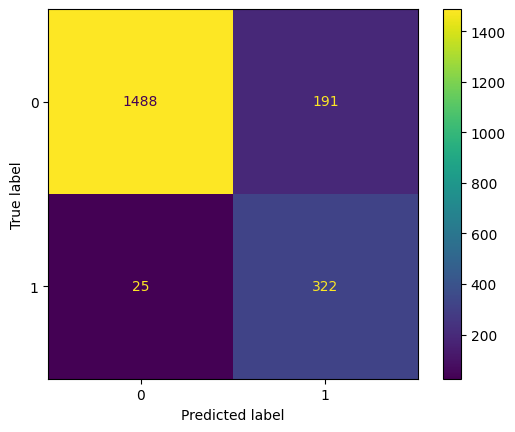

In [688]:
X = df2.to_numpy()
y = (df["Attrition_Flag"] != "Existing Customer").to_numpy()
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.20)
transformer = MaxAbsScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
# Still random forest but changes the underlying sampling logic.
rf = BalancedRandomForestClassifier(n_estimators=40,max_depth=5, min_samples_split=2, sampling_strategy='all', replacement=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(evaluation(y_pred,y_test))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()

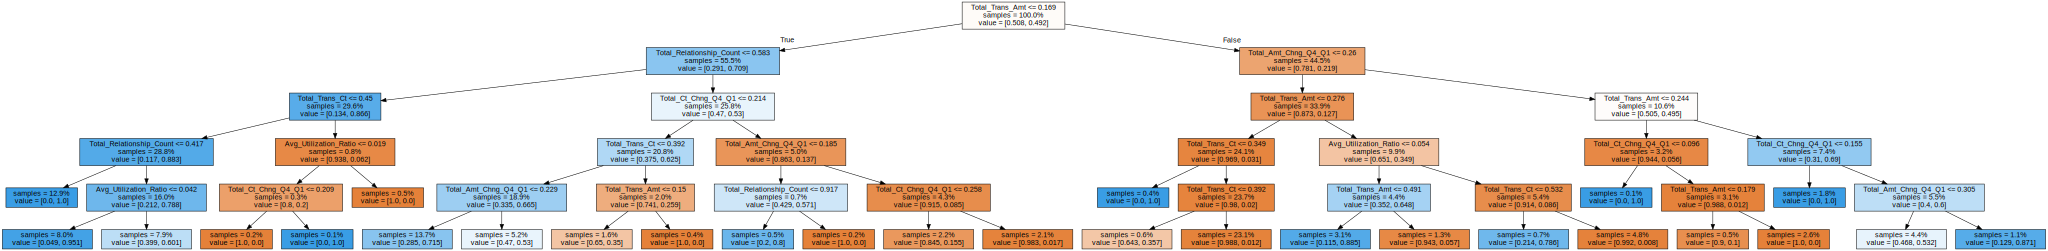

In [674]:
tree = rf.estimators_[randint(0,39)]
dot_data = export_graphviz(tree,
                            feature_names=df2.columns,  
                            filled=True,  
                            max_depth=5, 
                            impurity=False, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)


Indeed we can remove several features significantly simplifying our model without a significant loss in predictability. Since we have less features, we can also reduce the depth of the trees, it of course affects our prediction ability, but it hurts our precision far more than our recall, which is what really matters in this case. We continue to hardly ever not find someone who is about to leave even if we cast a wider net. Reducing the depth of our tress is less likely to cause overfitting, but depending on how the business wants to deal with the possible churners (in practice depending the cost of attacking the problem, sending automated e-mails = cheap, inviting them to the bank for a talk and promotional events = expensive) our sacrifice in precision might be worth it or not. If not, we need to be more careful with overfitting and not limit ourselves to such a low depth. For this exercise I'll assume that for now recall is far more important and sacrifing precision is worth it.

  Quantiles Real_Values       Proportion_total      Lift
                    sum count                           
0         1         914  1013         0.561770  5.616038
1         2         562  1013         0.345421  4.534612
2         3         121  1012         0.074370  3.271978
3         4          23  1013         0.014136  2.489121
4         5           6  1012         0.003688  1.998968
5         6           1  1013         0.000615  1.666722
6         7           0  1008         0.000000  1.429560
7         8           0  1015         0.000000  1.250401
8         9           0  1015         0.000000  1.111148
9        10           0  1013         0.000000  1.000000


/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

<Axes: ylabel='Lift'>

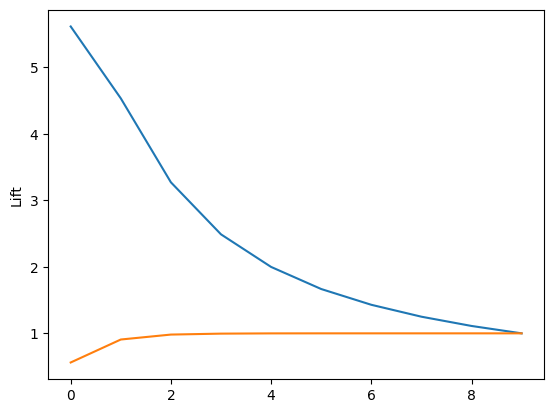

In [757]:
# Try to do a lift curve of our prediction

df_lift = df2.copy()
df_lift["Real_Values"] = df["Attrition_Flag"] != "Existing Customer"
df_lift["Predicted"] = rf.predict(transformer.transform(df2.to_numpy()))
df_lift["Prob"] = rf.predict_proba(transformer.transform(df2.to_numpy()))[:,1]
df_lift.sort_values(by='Prob', ascending = False, inplace=True)
quantile = 10
df_lift["Quantiles"] = quantile - pd.qcut(df_lift.Prob, quantile, labels=False)
df_lift = df_lift.groupby("Quantiles", as_index=False)[["Real_Values"]].agg(['sum','count'])
df_lift["Proportion_total"] = df_lift[("Real_Values", "sum")] / df_lift[("Real_Values", "sum")].sum()
df_lift["Lift"] = df_lift["Proportion_total"].cumsum() / (df_lift[("Real_Values", "count")].cumsum() / df_lift[("Real_Values", "count")].sum())
print(df_lift)
sns.lineplot(data=df_lift["Lift"])


/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/henrique/envs/credit/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

<Axes: ylabel='Proportion_total'>

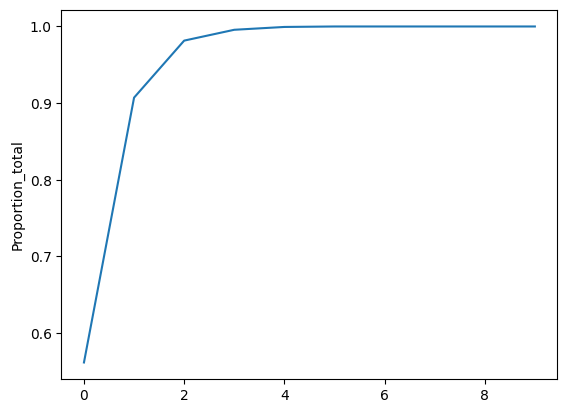

In [758]:
#Gain. Apparently with the top 30% of predictions I get like 95% of the people leaving.
sns.lineplot(data=df_lift["Proportion_total"].cumsum())